<a href="https://colab.research.google.com/github/lei-yang5/COMP8240project/blob/main/newData2Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/punyajoy/HateXplain.git

fatal: destination path 'HateXplain' already exists and is not an empty directory.


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
cd HateXplain/

/content/HateXplain


In [4]:
!mkdir Saved/
!mkdir explanations_dicts/

mkdir: cannot create directory ‘Saved/’: File exists
mkdir: cannot create directory ‘explanations_dicts/’: File exists


In [5]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip  -P Data/

--2022-10-30 06:26:19--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2022-10-30 06:26:19--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-10-30 06:26:20--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [6]:
!unzip Data/glove.42B.300d.zip -d Data/

Archive:  Data/glove.42B.300d.zip
  inflating: Data/glove.42B.300d.txt  


In [7]:
!rm Data/glove.42B.300d.zip

In [8]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached numpy-1.16.3-cp37-cp37m-manylinux1_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: Keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
xarray 0.20.2 requires numpy>=1.18, but you have numpy 1.16.3 which is incompatible.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 1.0.3 which is incompatible.
xarray-einstats 0.2.2 requi

In [9]:
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec('Data/glove.42B.300d.txt', 'Data/glove.42B.300d_w2v.txt')
word2vecmodel1 = KeyedVectors.load_word2vec_format('Data/glove.42B.300d_w2v.txt', binary=False)
word2vecmodel1.save("Data/word2vec.model")

In [10]:
import gc
del word2vecmodel1
gc.collect()

22

In [11]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
! pip install keras==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires numpy>=1.20, but you have numpy 1.16.3 which is incompatible.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.16.3 which is incompatible.


In [13]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 1.0.3 which is incompatible.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.1.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.1.0 which is incompatible.
prophet 1.1.1 requires pandas>=1.0.4, but you have pandas 1.0.3 which is incompatible.
plotnine 0.8.0 requ

In [14]:
!rm Data/glove.42B.300d.txt
!rm Data/glove.42B.300d_w2v.txt

In [15]:
from manual_training_inference import *

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading english - 1grams ...


In [16]:
path_file='best_model_json/bestModel_birnnscrat.json'
with open(path_file,mode='r') as f:
    params = json.load(f)
for key in params:
    if params[key] == 'True':
          params[key]=True
    elif params[key] == 'False':
          params[key]=False
    if( key in ['batch_size','num_classes','hidden_size','supervised_layer_pos','num_supervised_heads','random_seed','max_length']):
        if(params[key]!='N/A'):
            params[key]=int(params[key])
        
    if((key == 'weights') and (params['auto_weights']==False)):
        params[key] = ast.literal_eval(params[key])

##### change in logging to output the results to neptune
params['logging']='local'
params['device']='cpu'
params['best_params']=False

if torch.cuda.is_available() and params['device']=='cuda':    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
else:
    print('Since you dont want to use GPU, using the CPU instead.')
    device = torch.device("cpu")
    
    
#### Few handy keys that you can directly change.
params['variance']=1
params['epochs']=1
params['to_save']=True
params['num_classes']=2
params['data_file']=dict_data_folder[str(params['num_classes'])]['data_file']
params['class_names']=dict_data_folder[str(params['num_classes'])]['class_label']
if(params['num_classes']==2 and (params['auto_weights']==False)):
      params['weights']=[1.0,1.0]
        
#for att_lambda in [0.001,0.01,0.1,1,10,100]
train_model(params,device)

Since you dont want to use GPU, using the CPU instead.
[1.2301791 0.8423818]


0it [00:00, ?it/s]


======== Epoch 1 / 1 ========
Training...


481it [03:00,  2.66it/s]
2it [00:00, 14.34it/s]

avg_train_loss 295.310826164769
model previously passed
Running eval on  train ...


481it [00:33, 14.21it/s]
2it [00:00, 13.78it/s]

 Accuracy: 0.70
 Fscore: 0.70
 Precision: 0.74
 Recall: 0.73
 Roc Auc: 0.00
 Test took: 0:00:34
model previously passed
Running eval on  val ...


61it [00:04, 14.28it/s]
2it [00:00, 14.11it/s]

 Accuracy: 0.66
 Fscore: 0.66
 Precision: 0.72
 Recall: 0.70
 Roc Auc: 0.00
 Test took: 0:00:04
model previously passed
Running eval on  test ...


61it [00:04, 14.67it/s]


 Accuracy: 0.67
 Fscore: 0.67
 Precision: 0.72
 Recall: 0.71
 Roc Auc: 0.00
 Test took: 0:00:04
0.6588550826112853 0
Saving model
Saved/birnnscrat_lstm_64_2_100.pth
best_val_fscore 0.6588550826112853
best_test_fscore 0.6681477560194566
best_val_rocauc 0
best_test_rocauc 0
best_val_precision 0.7170125038941049
best_test_precision 0.720009958776411
best_val_recall 0.69933824923888
best_test_recall 0.7058196460644717


1

In [17]:
params['num_classes']=3
params['data_file']=dict_data_folder[str(params['num_classes'])]['data_file']
params['class_names']=dict_data_folder[str(params['num_classes'])]['class_label']
if(params['num_classes']==2 and (params['auto_weights']==False)):
      params['weights']=[1.0,1.0]
        
#for att_lambda in [0.001,0.01,0.1,1,10,100]
train_model(params,device)

[1.0796857 0.8201194 1.1703163]


0it [00:00, ?it/s]


======== Epoch 1 / 1 ========
Training...


481it [02:53,  2.76it/s]
2it [00:00, 12.78it/s]

avg_train_loss 295.6838341473046
model previously passed
Running eval on  train ...


481it [00:38, 12.60it/s]
2it [00:00, 14.03it/s]

 Accuracy: 0.65
 Fscore: 0.63
 Precision: 0.66
 Recall: 0.62
 Roc Auc: 0.81
 Test took: 0:00:38
model previously passed
Running eval on  val ...


61it [00:04, 14.57it/s]
2it [00:00, 14.22it/s]

 Accuracy: 0.61
 Fscore: 0.59
 Precision: 0.63
 Recall: 0.59
 Roc Auc: 0.78
 Test took: 0:00:04
model previously passed
Running eval on  test ...


61it [00:04, 14.80it/s]


 Accuracy: 0.62
 Fscore: 0.60
 Precision: 0.63
 Recall: 0.59
 Roc Auc: 0.78
 Test took: 0:00:04
0.5908456676414833 0
Saving model
Saved/birnnscrat_lstm_64_3_100.pth
best_val_fscore 0.5908456676414833
best_test_fscore 0.5953800433596727
best_val_rocauc 0.7813439473380873
best_test_rocauc 0.7833791469223108
best_val_precision 0.6323213563892517
best_test_precision 0.6334081070577146
best_val_recall 0.5854352674663518
best_test_recall 0.5917058159561318


1

In [18]:
import gc
gc.collect()

22

In [19]:
!python testing_with_rational.py birnn_scrat 100
!python testing_for_bias.py birnn_scrat 100

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))
Reading twitter - 1grams ...
Reading twitter - 2grams ...
/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in
Reading english - 1grams ...
Since you dont want to use GPU, using the CPU instead.
tcmalloc: large alloc 2300993536 bytes == 0x5e6da000 @  0x7fb11e4191e7 0x4b2590 0x5ad01c 0x5e46ad 0x58f90f 0x59172f 0x591ac9 0x4fc06a 0x4fc808 0x4fe70d 0x5f0318 0x58f62c 0x5105e2 0x58fd37 0x50c4fc 0x5b575e 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x6005a3 0x607796 0x60785c 0x60a436 0x64db82 0x64dd2e 0x7fb11e016c87 0x5b636a
tcmalloc: large alloc 2300993536 bytes == 0xe7940000 @  0x7fb11e4191e7 0x4b2590 0x5ad01c 0x4fc81a 0x4fe70d 0x5f0318 0x58f62c 0x5105e2 0x58fd3

In [20]:
!ls explanations_dicts

bestModel_birnnscrat_100_explanation_top5.json	bestModel_birnnscrat_bias.json




---

---




**Bias Calculation**

---



In [21]:
from collections import Counter,defaultdict
from tqdm.notebook import tqdm
import json
import numpy as np

In [22]:
# get_annotated_data method is used to load the dataset
from Preprocess.dataCollect import get_annotated_data

In [23]:
!pwd

/content/HateXplain


In [24]:
dict_data_folder={
      '2':{'data_file':'/content/HateXplain/Data/new2_dataset.json','class_label':'Data/classes_two.npy'},
      '3':{'data_file':'/content/HateXplain/Data/new2_dataset.json','class_label':'Data/classes.npy'}
}

params = {}

# We need to load the dataset with the labels as 'toxic' and 'non-toxic'. 
# We consider hatespeech and offensive as toxic and normal as non-toxic.
params['num_classes']=2  
params['data_file']=dict_data_folder[str(params['num_classes'])]['data_file']
params['class_names']=dict_data_folder[str(params['num_classes'])]['class_label']

data_all_labelled=get_annotated_data(params)
len(data_all_labelled)

20197

In [25]:
data_all_labelled

,post_id,text,annotatorid1,target1,label1,annotatorid2,target2,label2,annotatorid3,target3,label3,rationales,final_label
0,1179055004553900032_twitter,"[i, dont, think, im, getting, my, baby, them, ...",1,[None],normal,2,[None],normal,3,[None],normal,[],non-toxic
1,1179063826874032128_twitter,"[we, cannot, continue, calling, ourselves, fem...",1,[None],normal,2,[None],normal,3,[None],normal,[],non-toxic
2,1178793830532956161_twitter,"[nawt, yall, niggers, ignoring, me]",4,[African],normal,2,[None],normal,3,[African],hatespeech,[],non-toxic
3,1179088797964763136_twitter,"[<user>, i, am, bit, confused, coz, chinese, p...",1,[Asian],hatespeech,4,[Asian],offensive,3,[Asian],hatespeech,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",toxic
4,1179085312976445440_twitter,"[this, bitch, in, whataburger, eating, a, burg...",4,"[Caucasian, Women]",hatespeech,2,"[Women, Caucasian]",hatespeech,3,"[Women, Caucasian]",offensive,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",toxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20192,20221289450717841_tweeter,"[, Covid, was, released, from, a, lab, in, China]",Abreen,[Asian],hatespeech,Clary,[Asian],hatespeech,Lei,[Asian],hatespeech,"[[0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, ...",non-toxic
20193,202222456621025979_tweeter,"[, LOOOOL, a, suit, from, a, big, Cubano, clea...",Abreen,[],normal,Clary,[],normal,Lei,[],normal,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",non-toxic
20194,202278595017479256_tweeter,"[, LOOOOL, a, suit, from, a, big, Cubano, clea...",Abreen,[],normal,Clary,[],normal,Lei,[],normal,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",non-toxic
20195,202215785677977454_tweeter,"[, It, was, happening, before, the, so, we, ca...",Abreen,[],normal,Clary,[],normal,Lei,[],normal,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",non-toxic


In [26]:
def generate_target_information(dataset):
    final_target_output = defaultdict(list)
    all_communities_selected = []
    
    for each in dataset.iterrows(): 
        # All the target communities tagged for this post
        all_targets = each[1]['target1']+each[1]['target2']+each[1]['target3']  
        community_dict = dict(Counter(all_targets))
        
        # Select only those communities which are present more than once.
        for key in community_dict:
            if community_dict[key]>1:  
                final_target_output[each[1]['post_id']].append(key)
                all_communities_selected.append(key)
        
        # If no community is selected based on majority voting then we don't select any community
        if each[1]['post_id'] not in final_target_output:
            final_target_output[each[1]['post_id']].append('None')
            all_communities_selected.append(key)

    return final_target_output, all_communities_selected

In [27]:
target_information, all_communities_selected = generate_target_information(data_all_labelled)

In [28]:
community_count_dict = Counter(all_communities_selected)

# We remove None and Other from dictionary
community_count_dict.pop('None')
community_count_dict.pop('Other')

# For the bias calculation, we are considering the top 10 communites based on their count
list_selected_community = [community for community, value in community_count_dict.most_common(10)]
list_selected_community

['African',
 'Islam',
 'Jewish',
 'Homosexual',
 'Women',
 'Refugee',
 'Arab',
 'Caucasian',
 'Asian',
 'Hispanic']

In [29]:
# Based on the top 10 communities, we filter the target_information
# This will remove the other communities from the calculation

final_target_information ={}
for each in target_information:
    temp = list(set(target_information[each])&set(list_selected_community))
    if len(temp) == 0:
        final_target_information[each] = None
    else:
        final_target_information[each] = temp

In [30]:
# Add a new column 'final_target_category' which will contain the selected target community names
data_all_labelled['final_target_category'] = data_all_labelled['post_id'].map(final_target_information)

In [31]:
# The post_id_divisions file stores the train, val, test split ids. We select only the test ids.
postpost_id_divisions_path = '/content/HateXplain/Data/final2_post_id_divisions.json'

with open(postpost_id_divisions_path, 'r') as fp:
    post_id_dict=json.load(fp)

data_all_labelled_bias = data_all_labelled[data_all_labelled['post_id'].isin(post_id_dict['test'])]
data_all_labelled_bias

,post_id,text,annotatorid1,target1,label1,annotatorid2,target2,label2,annotatorid3,target3,label3,rationales,final_label,final_target_category
0,1179055004553900032_twitter,"[i, dont, think, im, getting, my, baby, them, ...",1,[None],normal,2,[None],normal,3,[None],normal,[],non-toxic,None
5,13851720_gab,"[laura, loomer, raped, me, while, screaming, a...",1,[Jewish],hatespeech,2,[Jewish],hatespeech,3,[Jewish],hatespeech,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,...",toxic,[Jewish]
17,1178818409812746240_twitter,"[<user>, what, did, the, old, lady, do, was, s...",9,[None],normal,10,[None],normal,4,[None],normal,[],non-toxic,None
25,19346774_gab,"[as, much, as, i, appreciate, a, format, of, o...",9,[None],normal,13,[None],normal,4,[Hispanic],offensive,[],non-toxic,None
36,1165819983701643266_twitter,"[sex, be, so, good, a, bitch, be, slow, stroki...",4,[Women],offensive,7,[Women],offensive,16,[None],normal,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, ...",toxic,[Women]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,9773208_gab,"[it, always, women, trying, this, shit, like, ...",200,[Women],hatespeech,202,[Women],offensive,203,[Women],offensive,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",toxic,[Women]
20109,9802943_gab,"[because, women, would, never, lie, about, bei...",228,[Women],offensive,222,[Women],offensive,209,[Women],normal,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",toxic,[Women]
20117,9826963_gab,"[how, is, all, that, awesome, muslim, diversit...",228,[Islam],offensive,222,[Islam],offensive,209,[Islam],offensive,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",toxic,[Islam]
20128,9867117_gab,"[well, my, dear, lgbtq, brothers, and, sisters...",207,"[Islam, Other]",offensive,223,[Islam],hatespeech,231,[Islam],hatespeech,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",toxic,[Islam]


In [32]:
len(data_all_labelled_bias)

1924

In [33]:
from sklearn.metrics import roc_auc_score

# The names of the files which will contain the bias output for each model
bias_score_file_mapping={
    'BiRNN-Attn':'bestModel_birnnscrat_bias.json',
}

# The parent folder path of the bias output files
parent_path = './explanations_dicts/'

# The bias methods that will be considered
method_list = ['subgroup', 'bpsn', 'bnsp']

community_list = list(list_selected_community)

In [34]:
# This function is used to convert the classification into a [0-1] score 
# with a value of 0 meaning non-toxic and 1 meaning toxic
def convert_to_score(label_name, label_dict):
    if label_name=='non-toxic':
        return 1-label_dict[label_name]
    else:
        return label_dict[label_name]

In [35]:
# Function to divide the ids into postive or class class based on the method.
def bias_evaluation_metric(dataset, method, community):
    positive_ids = []
    negative_ids = []
    if method=='subgroup':
        for eachrow in dataset.iterrows():
            if eachrow[1]['final_target_category'] == None:
                continue
            if community in eachrow[1]['final_target_category']:
                if eachrow[1]['final_label'] =='non-toxic':
                    negative_ids.append(eachrow[1]['post_id'])
                else:
                    positive_ids.append(eachrow[1]['post_id'])
            else:
                pass
    elif method=='bpsn':
        for eachrow in dataset.iterrows():
            if eachrow[1]['final_target_category'] == None:
                continue
            if community in eachrow[1]['final_target_category']:
#                 print(eachrow[1]['final_label'])
                if eachrow[1]['final_label'] =='non-toxic':
                    negative_ids.append(eachrow[1]['post_id'])
                else:
                    pass
            else:
                if eachrow[1]['final_label'] !='non-toxic':
                    positive_ids.append(eachrow[1]['post_id'])
                else:
                    pass
    elif method=='bnsp':
        for eachrow in dataset.iterrows():
            if eachrow[1]['final_target_category'] == None:
                continue
            if community in eachrow[1]['final_target_category']:
                if eachrow[1]['final_label'] !='non-toxic':
                    positive_ids.append(eachrow[1]['post_id'])
                else:
                    pass
            else:
                if eachrow[1]['final_label'] =='non-toxic':
                    negative_ids.append(eachrow[1]['post_id'])
                else:
                    pass
    else:
        print('Incorrect option selected!!!')
                
    return {'positiveID':positive_ids, 'negativeID':negative_ids}

In [36]:
final_bias_dictionary = defaultdict(lambda: defaultdict(dict))

# We load each of the model bias output file and compute the bias score using each method for all the community
for each_model in tqdm(bias_score_file_mapping):
    total_data ={}
    with open(parent_path+bias_score_file_mapping[each_model]) as fp:
        for line in fp:
            data = json.loads(line)
            total_data[data['annotation_id']] = data
    for each_method in method_list:
        for each_community in community_list:
            community_data = bias_evaluation_metric(data_all_labelled_bias, each_method, each_community)
            truth_values = []
            prediction_values = []


            label_to_value = {'toxic':1.0, 'non-toxic':0.0}
            for each in community_data['positiveID']:
                truth_values.append(label_to_value[total_data[each]['ground_truth']])
                prediction_values.append(convert_to_score(total_data[each]['classification'], total_data[each]['classification_scores']))

            for each in community_data['negativeID']:
                truth_values.append(label_to_value[total_data[each]['ground_truth']])
                prediction_values.append(convert_to_score(total_data[each]['classification'], total_data[each]['classification_scores']))

            roc_output_value = roc_auc_score(truth_values, prediction_values)
            final_bias_dictionary[each_model][each_method][each_community] = roc_output_value

In [37]:
len(total_data)

1924

In [38]:
%precision 4

'%.4f'

In [39]:
# To combine the per-identity Bias AUCs into one overall measure, we calculate their generalized mean as defined below:
power_value = -5
num_communities = len(community_list)

for each_model in final_bias_dictionary:
    for each_method in final_bias_dictionary[each_model]:
        temp_value =[]
        for each_community in final_bias_dictionary[each_model][each_method]:
            temp_value.append(pow(final_bias_dictionary[each_model][each_method][each_community], power_value))
        print(each_model, each_method, pow(np.sum(temp_value)/num_communities, 1/power_value))

BiRNN-Attn subgroup 0.6754469363110213
BiRNN-Attn bpsn 0.6101327177142991
BiRNN-Attn bnsp 0.6447702695441282




---


**Explainability Calculation**

---



In [40]:
import json
from tqdm.notebook import tqdm
import more_itertools as mit
import os

In [41]:
# get_annotated_data method is used to load the dataset
from Preprocess import *
from Preprocess.dataCollect import *

In [61]:
dict_data_folder={
      '2':{'data_file':'/content/HateXplain/Data/new2_dataset.json','class_label':'Data/classes_two.npy'},
      '3':{'data_file':'/content/HateXplain/Data/new2_dataset.json','class_label':'Data/classes.npy'}
}

# We need to load the dataset with the labels as 'hatespeech', 'offensive', and 'normal' (3-class). 

params = {}
params['num_classes']=3
params['data_file']=dict_data_folder[str(params['num_classes'])]['data_file']
params['class_names']=dict_data_folder[str(params['num_classes'])]['class_label']

data_all_labelled=get_annotated_data(params)

In [62]:
# The important key here is the 'bert_token'. Set it to True for Bert based models and False for Others.

params_data={
    'include_special':False,  #True is want to include <url> in place of urls if False will be removed
    'bert_tokens':False, #True /False
    'type_attention':'softmax', #softmax
    'set_decay':0.1,
    'majority':2,
    'max_length':128,
    'variance':10,
    'window':4,
    'alpha':0.5,
    'p_value':0.8,
    'method':'additive',
    'decay':False,
    'normalized':False,
    'not_recollect':True,
}


if(params_data['bert_tokens']):
    print('Loading BERT tokenizer...')
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=False)
else:
    print('Loading Normal tokenizer...')
    tokenizer=None

Loading Normal tokenizer...


In [63]:
# Load the whole dataset and get the tokenwise rationales
def get_training_data(data):
    post_ids_list=[]
    text_list=[]
    attention_list=[]
    label_list=[]
    
    final_binny_output = []
    print('total_data',len(data))
    for index,row in tqdm(data.iterrows(),total=len(data)):
        annotation=row['final_label']
        
        text=row['text']
        post_id=row['post_id']
        annotation_list=[row['label1'],row['label2'],row['label3']]
        tokens_all = list(row['text'])
#         attention_masks =  [list(row['explain1']),list(row['explain2']),list(row['explain1'])]
        
        if(annotation!= 'undecided'):
            tokens_all,attention_masks=returnMask(row, params_data, tokenizer)
            final_binny_output.append([post_id, annotation, tokens_all, attention_masks, annotation_list])

    return final_binny_output

In [65]:
training_data=get_training_data(data_all_labelled)

  0%|          | 63/20197 [00:00<00:32, 625.89it/s]

total_data 20197


100%|██████████| 20197/20197 [00:29<00:00, 674.02it/s]


In [66]:
# https://stackoverflow.com/questions/2154249/identify-groups-of-continuous-numbers-in-a-list
def find_ranges(iterable):
    """Yield range of consecutive numbers."""
    for group in mit.consecutive_groups(iterable):
        group = list(group)
        if len(group) == 1:
            yield group[0]
        else:
            yield group[0], group[-1]
            
# Convert dataset into ERASER format: https://github.com/jayded/eraserbenchmark/blob/master/rationale_benchmark/utils.py
def get_evidence(post_id, anno_text, explanations):
    output = []

    indexes = sorted([i for i, each in enumerate(explanations) if each==1])
    span_list = list(find_ranges(indexes))

    for each in span_list:
        if type(each)== int:
            start = each
            end = each+1
        elif len(each) == 2:
            start = each[0]
            end = each[1]+1
        else:
            print('error')

        output.append({"docid":post_id, 
              "end_sentence": -1, 
              "end_token": end, 
              "start_sentence": -1, 
              "start_token": start, 
              "text": ' '.join([str(x) for x in anno_text[start:end]])})
    return output

# To use the metrices defined in ERASER, we will have to convert the dataset
def convert_to_eraser_format(dataset, method, save_split, save_path, id_division):  
    final_output = []
    
    if save_split:
        train_fp = open(save_path+'train.jsonl', 'w')
        val_fp = open(save_path+'val.jsonl', 'w')
        test_fp = open(save_path+'test.jsonl', 'w')
            
    for tcount, eachrow in enumerate(dataset):
        
        temp = {}
        post_id = eachrow[0]
        post_class = eachrow[1]
        anno_text_list = eachrow[2]
        majority_label = eachrow[1]
        
        if majority_label=='normal':
            continue
        
        all_labels = eachrow[4]
        explanations = []
        for each_explain in eachrow[3]:
            explanations.append(list(each_explain))
        
        # For this work, we have considered the union of explanations. Other options could be explored as well.
        if method == 'union':
            final_explanation = [any(each) for each in zip(*explanations)]
            final_explanation = [int(each) for each in final_explanation]
        
            
        temp['annotation_id'] = post_id
        temp['classification'] = post_class
        temp['evidences'] = [get_evidence(post_id, list(anno_text_list), final_explanation)]
        temp['query'] = "What is the class?"
        temp['query_type'] = None
        final_output.append(temp)
        
        if save_split:
            if not os.path.exists(save_path+'docs'):
                os.makedirs(save_path+'docs')
            
            with open(save_path+'docs/'+post_id, 'w') as fp:
                fp.write(' '.join([str(x) for x in list(anno_text_list)]))
            
            if post_id in id_division['train']:
                train_fp.write(json.dumps(temp)+'\n')
            
            elif post_id in id_division['val']:
                val_fp.write(json.dumps(temp)+'\n')
            
            elif post_id in id_division['test']:
                test_fp.write(json.dumps(temp)+'\n')
            else:
                print(post_id)
    
    if save_split:
        train_fp.close()
        val_fp.close()
        test_fp.close()
        
    return final_output

In [68]:
!pwd

/content/HateXplain/eraserbenchmark


In [69]:
# The post_id_divisions file stores the train, val, test split ids. We select only the test ids.
with open('/content/HateXplain/Data/final2_post_id_divisions.json') as fp:
    id_division = json.load(fp)

In [72]:
!mkdir /content/HateXplain/Data/Evaluation
!mkdir /content/HateXplain/Data/Evaluation/Model_Eval

mkdir: cannot create directory ‘/content/HateXplain/Data/Evaluation’: File exists
mkdir: cannot create directory ‘/content/HateXplain/Data/Evaluation/Model_Eval’: File exists


In [73]:
method = 'union'
save_split = True
save_path = '/content/HateXplain/Data/Evaluation/Model_Eval/'  #The dataset in Eraser Format will be stored here.
output_eraser = convert_to_eraser_format(training_data, method, save_split, save_path, id_division)

202271234819374164_tweeter
202286621642816856_tweeter
202270076496768511_tweeter
20226174138634896_tweeter
202294029739425649_tweeter
202275083095983040_tweeter
202251621052154917_tweeter
202272686717140011_tweeter
202221304463855513_tweeter
202283547509701064_tweeter
20225474354819644_tweeter
202224057072620967_tweeter
202235978087743292_tweeter
20226200177305469_tweeter
202271571706629254_tweeter
2022441876275850_tweeter
202274661837388198_tweeter
202224252943863908_tweeter
202220775735822625_tweeter
202283501818322860_tweeter
20224665237916916_tweeter
202297443767427150_tweeter
202221843521932442_tweeter
202231447354105357_tweeter
2022365432069241_tweeter
202233250312176522_tweeter
202244356376587534_tweeter
202232399203405907_tweeter
202255477615964561_tweeter
202292508885698536_tweeter
202269047287005382_tweeter
20221289450717841_tweeter


In [74]:
!ls Data/Evaluation/Model_Eval/

ls: cannot access 'Data/Evaluation/Model_Eval/': No such file or directory


In [51]:
!ls

best_model_json			     Models
best_runs.sh			     Parameters_description.md
Bias_Calculation_NB.ipynb	     parameters_selection.py
convert_to_word2vec.py		     Preprocess
Data				     __pycache__
eraserbenchmark			     README.md
Example_HateExplain.ipynb	     requirements.txt
Explainability_Calculation_NB.ipynb  Saved
explanations_dicts		     TensorDataset
Figures				     testing_for_bias.py
HateXplain			     testing_with_lime.py
LICENSE				     testing_with_rational.py
manual_training_inference.py	     test_parallel.sh
model_explain_output.json


In [52]:
cd eraserbenchmark/

/content/HateXplain/eraserbenchmark


In [53]:
!ls 

data_exploration.ipynb	LICENSE  rationale_benchmark  REPRODUCTION.txt
HateXplain		params	 README.md	      requirements.txt


In [54]:
!PYTHONPATH=./:$PYTHONPATH python rationale_benchmark/metrics.py --split test  --data_dir ../Data/Evaluation/Model_Eval --results ../explanations_dicts/bestModel_birnnscrat_100_explanation_top5.json --score_file ../model_explain_output.json

  1810 MainThread Error in instances: 0 instances fail validation: set()
  3351 MainThread No sentence level predictions detected, skipping sentence-level diagnostic
Traceback (most recent call last):
  File "rationale_benchmark/metrics.py", line 670, in <module>
    main()
  File "rationale_benchmark/metrics.py", line 658, in main
    class_results = score_classifications(results, annotations, flattened_documents, args.aopc_thresholds)
  File "rationale_benchmark/metrics.py", line 293, in score_classifications
    inst = key_to_instances[ann.annotation_id]
KeyError: '202271558011728624_tweeter'


In [75]:
!pwd

/content/HateXplain/eraserbenchmark


In [76]:
# print the required results
with open('../model_explain_output.json') as fp:
    output_data = json.load(fp)

print('\nPlausibility')
print('IOU F1 :', output_data['iou_scores'][0]['macro']['f1'])
print('Token F1 :', output_data['token_prf']['instance_macro']['f1'])
print('AUPRC :', output_data['token_soft_metrics']['auprc'])

print('\nFaithfulness')
print('Comprehensiveness :', output_data['classification_scores']['comprehensiveness'])
print('Sufficiency', output_data['classification_scores']['sufficiency'])


Plausibility
IOU F1 : 0.22556572791882537
Token F1 : 0.4933001129231857
AUPRC : 0.8179723648640134

Faithfulness
Comprehensiveness : 0.12690107161619676
Sufficiency -0.008355937659035664


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [78]:
tuple_community = []
for each_model in final_bias_dictionary:
    # Select the metric which you want to view. Possible values are subgroup, bpsn, bnsp
    each_method = 'bnsp' 
    
    for each_community in final_bias_dictionary[each_model][each_method]:
        tuple_community.append((each_model, each_community, final_bias_dictionary[each_model][each_method][each_community]))

In [79]:
df_community_score = pd.DataFrame(tuple_community, columns=['Model', 'Community', 'AUCROC'])

bnsp


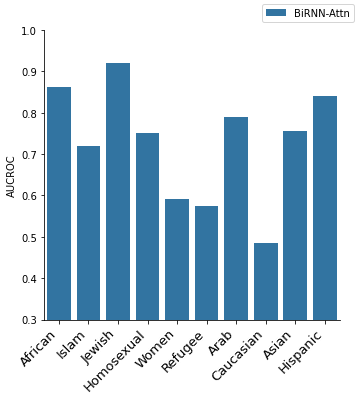

In [81]:
ax = sns.catplot(x="Community", y="AUCROC", hue="Model",
             data=df_community_score,
                 legend=False,
                kind="bar");
ax.set(ylim=(0.3, 1.0))
ax.set_xticklabels(rotation=45, size=13, horizontalalignment='right')

# sns.set(font_scale = 0.1)



handles = ax._legend_data.values()
labels = ax._legend_data.keys()

ax.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=3)
ax.fig.subplots_adjust(top=0.92)

ax.set(xlabel="")  

print(each_method)
plt.savefig('bias-'+each_method+'.pdf', dpi=300, transparent=True, bbox_inches='tight')